In [2]:
def regularPermutationsInSymmetricGroup(finiteGroup):
    from sage.matrix.operation_table import OperationTable
    G = finiteGroup
    O = OperationTable(G,operator.mul,names="elements")
    #print(latex(O.table()))
    ll = [ Permutation([xx +1 for xx in x]) for x in O.table()] 
    return ll


def iterMat(group,i=1):
    perms = regularPermutationsInSymmetricGroup(group)
    if i==0:
        return perms
    elif i >= 1:
        mm1 = iterMat(group,i-1)
        nn = perms
        MM = []
        for c in mm1:
            for row in nn:
                ll = []
                for col in nn:
                    for r in c:
                        ll.append((row*col)[r-1])
                MM.append(ll)    
        return MM
        

print(matrix(iterMat(CyclicPermutationGroup(2),0)))        

[1 2]
[2 1]


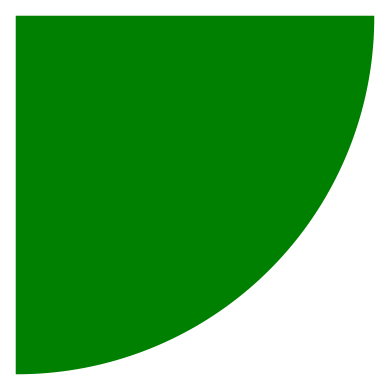

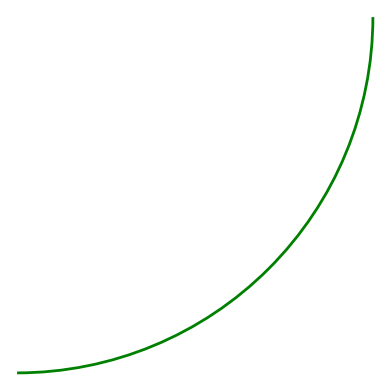

In [3]:
from sage.plot.plot import polygon
from sage.plot.arc import Arc
from sage.all import srange, pi, cos, sin

def filled_arc(center, radius, sector=(0, 2*pi), color='blue', axes=False, fill=True):
    x, y = center  # Entpacke den Mittelpunkt
    start_angle, end_angle = sector  # Entpacke den Winkelbereich

    # Erzeuge den gefüllten Kreisbogen nur, wenn fill=True ist
    if fill:
        # Erstelle die Punkte des Polygons, die den gefüllten Bogen darstellen
        points = [(x, y)]  # Startpunkt im Zentrum
        for angle in srange(start_angle, end_angle, (end_angle - start_angle) / 100):  # Winkelbereich durchlaufen
            points.append((x + radius * cos(angle), y + radius * sin(angle)))

        # Schließe das Polygon
        points.append((x + radius * cos(end_angle), y + radius * sin(end_angle)))

        # Zeichne das gefüllte Polygon
        return polygon(points, color=color, axes=axes,thickness=2,fill=fill)
    else:
        # Falls fill=False, gib den normalen Kreisbogen zurück
        return arc(center, radius, sector=sector, color=color, axes=axes,thickness=2)

# Beispielaufruf
show(filled_arc((0, 0), 2, sector=(270*pi/180, 360*pi/180), color='green', fill=True))
show(filled_arc((0, 0), 2, sector=(270*pi/180, 360*pi/180), color='green', fill=False))


In [4]:
def regularPermutationsInSymmetricGroup(finiteGroup):
    from sage.matrix.operation_table import OperationTable
    G = finiteGroup
    O = OperationTable(G,operator.mul,names="elements")
    #print(latex(O.table()))
    ll = [ Permutation([xx +1 for xx in x]) for x in O.table()] 
    return ll

def regularPermutationsInSymmetricGroupOfConjugacyClasses(finiteGroup):
    #print(dir(finiteGroup))
    from sage.matrix.operation_table import OperationTable
    ccr = list(finiteGroup.conjugacy_classes_representatives())
    G = list(finiteGroup)
    ccrind = [G.index(c) for c in ccr]
    O = OperationTable(G,operator.mul,names="elements")
    #print(latex(O.table()))
    Ot = list(O.table())
    ll = [ Permutation([xx +1 for xx in x]) for x in Ot if Ot.index(x) in ccrind] 
    return ll

def embeddInMatrixSpace(sigma,normalized=False):
    """sigma = Permutation"""
    n = len(sigma)
    m = matrix([[0 for i in range(n)] for j in range(n)])
    for i in range(n):
        for j in range(n):
            m[i,j] = 1*(sigma(i+1)>sigma(j+1))-1*(sigma(i+1)<sigma(j+1))
    if normalized:
        return 1/sqrt(n*(n-1))*m
    else:
        return m

def kk(p1,p2):
    m1 = embeddInMatrixSpace(p1)
    m2 = embeddInMatrixSpace(p2)
    return (m1*m2.transpose()).trace()

def grammat(group):
    perms = regularPermutationsInSymmetricGroup(group)    
    return matrix([[kk(p1,p2) for p1 in perms] for p2 in perms])


def distmat(group):
    perms = regularPermutationsInSymmetricGroup(group)    
    nor = kk(p1,p1)
    return matrix([[sqrt(nor-kk(p1,p2)) for p1 in perms] for p2 in perms])

def dist(p1,p2):
    nor = kk(p1,p1)
    return sqrt(nor-kk(p1,p2)).n()


D8
D8 None False False
Folder './truchet_tiles_of_groups/bw_0/' already exists.


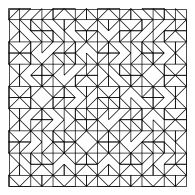

D8 None False True
Folder './truchet_tiles_of_groups/filled_bw_0/' already exists.


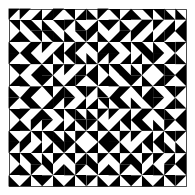

D8 None True False
Folder './truchet_circles_of_groups/bw_0/' already exists.


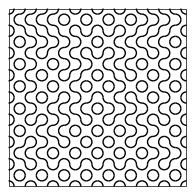

D8 None True True
Folder './truchet_circles_of_groups/filled_bw_0/' already exists.


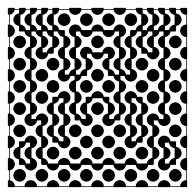

D8 AUTUMN False False
Folder './truchet_tiles_of_groups/colored_0/' already exists.


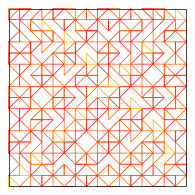

D8 AUTUMN False True
Folder './truchet_tiles_of_groups/filled_colored_0/' already exists.


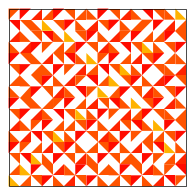

D8 AUTUMN True False
Folder './truchet_circles_of_groups/colored_0/' already exists.


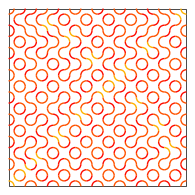

D8 AUTUMN True True
Folder './truchet_circles_of_groups/filled_colored_0/' already exists.


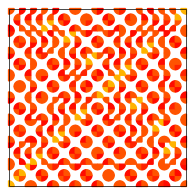

D8 SPRING False False
Folder './truchet_tiles_of_groups/colored_0/' already exists.


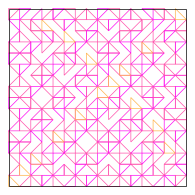

D8 SPRING False True
Folder './truchet_tiles_of_groups/filled_colored_0/' already exists.


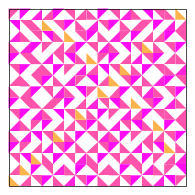

D8 SPRING True False
Folder './truchet_circles_of_groups/colored_0/' already exists.


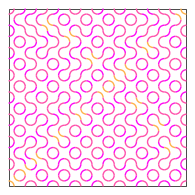

D8 SPRING True True
Folder './truchet_circles_of_groups/filled_colored_0/' already exists.


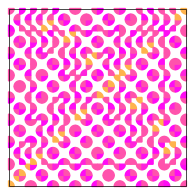

D8 SUMMER False False
Folder './truchet_tiles_of_groups/colored_0/' already exists.


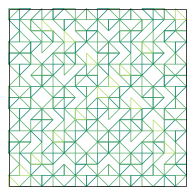

D8 SUMMER False True
Folder './truchet_tiles_of_groups/filled_colored_0/' already exists.


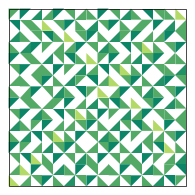

D8 SUMMER True False
Folder './truchet_circles_of_groups/colored_0/' already exists.


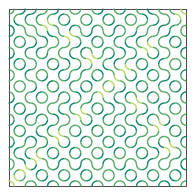

D8 SUMMER True True
Folder './truchet_circles_of_groups/filled_colored_0/' already exists.


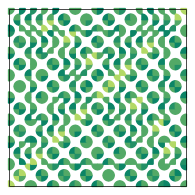

D8 WINTER False False
Folder './truchet_tiles_of_groups/colored_0/' already exists.


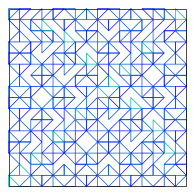

D8 WINTER False True
Folder './truchet_tiles_of_groups/filled_colored_0/' already exists.


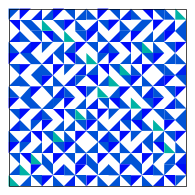

D8 WINTER True False
Folder './truchet_circles_of_groups/colored_0/' already exists.


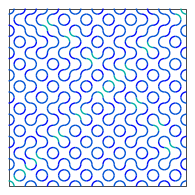

D8 WINTER True True
Folder './truchet_circles_of_groups/filled_colored_0/' already exists.


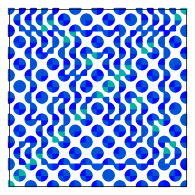

In [6]:
# Import necessary libraries
import random
from sage.plot.graphics import Graphics

def truchet_tile_circle(x, y, tile_type, size=1,color="black",fill=True):
    """
    Draw a single Truchet tile at position (x, y) with a given type (0 or 1).
    """
    g = Graphics()
    if tile_type == 0:
        # Tile with arcs in top-left and bottom-right corners
        g += filled_arc((x, y + size), size/2, sector=(270*pi/180, 360*pi/180), color=color,axes=False,fill=fill)
        g += filled_arc((x + size, y ), size/2, sector=(90*pi/180, 180*pi/180), color=color,axes=False,fill=fill)
    else:
        # Tile with arcs in top-right and bottom-left corners
        g += filled_arc((x + size, y + size), size/2, sector=(180*pi/180,270*pi/180), color=color,axes=False,fill=fill)
        g += filled_arc((x, y), size/2, sector=(0*pi/180, 90*pi/180), color=color,axes=False,fill=fill)
    return g

def truchet_tile(x, y, tile_type, size=1,color="black",fill=True):
    """
    Draw a single Truchet tile at position (x, y) with a given type (0 or 1).
    """
    g = Graphics()
    if tile_type == 0:
        # Tile with arcs in top-left and bottom-right corners
        g += polygon([(x,y),(x+size,y+size),(x,y+size)], color=color,axes=False,fill=fill,aspect_ratio=1)
    elif tile_type==1:
        # Tile with arcs in top-right and bottom-left corners
        g += polygon([(x,y),(x+size,y),(x,y+size)], color=color,axes=False,fill=fill,aspect_ratio=1)
    elif tile_type==2:
        g += polygon([(x,y),(x+size,y),(x+size,y+size)], color=color,axes=False,fill=fill,aspect_ratio=1)
    elif tile_type==3:    
        g += polygon([(x+size,y),(x+size,y+size),(x,y+size)], color=color,axes=False,fill=fill,aspect_ratio=1)
    return g

from sage.plot.colors import rgbcolor
def truchet_pattern(group, size=1,circles=True,color_mode=None,fill=True,iterDepth=1):
    """
    Create a grid of Truchet tiles with specified number of rows and columns.
    """
    pattern = Graphics()
    perms = regularPermutationsInSymmetricGroup(group) 
    gr = matrix(iterMat(group,iterDepth)) #grammat(group)
    #g = gcd(gr.list())
    rows,cols = len(gr.rows()),len(gr.columns())
    n = rows
    #Sn = SymmetricGroup(n)
    num_labels = n
    labels = np.array([[x] for x in list(range(0,n))])
    label_hue = np.uint8(179 * labels / np.max(labels))
    if color_mode is None:
        label_hue = cv.applyColorMap(label_hue, getattr(cv, 'COLORMAP_SUMMER'))      
    else:    
        label_hue = cv.applyColorMap(label_hue, getattr(cv, 'COLORMAP_' + color_mode.upper()))      
    max_cycle_length = max(len(pe.cycle_tuples()) for pe in perms)        
    
    
    for i in range(rows):
        for j in range(cols):
            if color_mode is None:
                color = "black"
            else:
                #h = 
                cl = len((perms[gr[i,j]-1]).cycle_tuples())
                lh = label_hue[int(cl/max_cycle_length*(len(label_hue)-1))]
                #print(cl,lh)
                b,g,r = lh[0]
                col = Color(r=r/255,g=g/255,b=b/255,space="rgb")
                sat = 1
                val = 1
                #print(col,r,g,b)
                color = col
            if circles:
                pattern += truchet_tile_circle(j*size, i*size, gr[i,j]%2, size,color,fill)
            else:
                pattern += truchet_tile(j*size, i*size, gr[i,j]%4, size,color,fill)
    pattern += polygon([(0,0), (0,n*size), (n*size,n*size),(n*size,0)],fill=False,axes=False,color="black")
    return pattern

import cv2 as cv
import numpy as np
from sage.plot.plot import Graphics

def sage_plot_to_cv2_array(plot, format='png', dpi=1000,figsize=[8,8],aspect_ratio=1):
    """
    Convert a SageMath plot object to a NumPy array that can be used with OpenCV.

    Parameters:
    - plot: SageMath plot object.
    - format: String, the format to save temporary image file.
    - dpi: Integer, the resolution of the image file.

    Returns:
    - img: NumPy array, the image in BGR format used in OpenCV.
    """
    import tempfile
    import os
    
    # Create a temporary file path
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.' + format)
    temp_file_path = temp_file.name
    
    try:
        # Save the plot to a file
        plot.save(temp_file_path, dpi=dpi,figsize=figsize,aspect_ratio=aspect_ratio)
        
        # Load the image with OpenCV
        img = cv.imread(temp_file_path)
        
        # Ensure the image is in BGR format
        if img is None:
            raise IOError("Could not load the image correctly.")
        
        return img
    
    finally:
        # Clean up the temporary file
        os.remove(temp_file_path)

import cv2 as cv
import numpy as np


def create_colored_labels(image, color_mode):
    """
    Create an image of connected components with specified color modes or custom hues.
    
    Args:
    - image (numpy.ndarray): The input image on which connected component analysis is to be performed.
    - color_mode (str or list): If string, use predefined color maps. If list, use custom hue values in degrees.
    
    Returns:
    - labeled_img (numpy.ndarray): The resulting image with components colored according to `color_mode`.
    """
    # Convert to grayscale
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    # Threshold to get binary image
    _, thresh = cv.threshold(gray, int(127), int(255), cv.THRESH_BINARY)
    
    # Apply connected components
    num_labels, labels = cv.connectedComponents(thresh)
    
    # Check if using custom hues or a predefined colormap
    if isinstance(color_mode, list):
        # Map labels to custom hue values
        label_hue = np.zeros_like(labels, dtype=np.uint8)
        hues = np.array(color_mode)
        for i in range(1, num_labels):
            label_hue[labels == i] = hues[(i - 1) % len(hues)] * 179 // 360
    else:
        # Use a predefined color map (skip grayscale conversion)
        label_hue = np.uint8(179 * labels / np.max(labels))
        label_hue = cv.applyColorMap(label_hue, getattr(cv, 'COLORMAP_' + color_mode.upper()))

    # Full saturation and value channels
    saturation_ch = 255 * np.ones_like(label_hue[:, :, 0], dtype=np.uint8)
    value_ch = 255 * np.ones_like(label_hue[:, :, 0], dtype=np.uint8)
    
    # Convert the BGR result of colormap directly to HSV and modify saturation/value
    labeled_img = cv.cvtColor(label_hue, cv.COLOR_BGR2HSV)
    labeled_img[:, :, 1] = saturation_ch
    labeled_img[:, :, 2] = value_ch
    
    # Convert back to BGR
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
    
    # Set background label to white
    labeled_img[labels == 0] = 255
    
    return labeled_img

import os

def ensure_folder_exists(folder_path):
    """
    Checks if the specified folder exists. If not, creates it.

    Args:
    - folder_path (str): The path to the folder to check or create.
    
    Returns:
    - None
    """
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created.")
    else:
        print(f"Folder '{folder_path}' already exists.")     
       

def plot_truchet(group,size,name,color_mode=None,circles=False,fill=True,iterDepth=0):
    plt = truchet_pattern(group,size,circles=circles,color_mode=color_mode,fill=fill,iterDepth=iterDepth)
    if not color_mode is None:
        if not circles:
            if fill:
                folder = "./truchet_tiles_of_groups/filled_colored_"+str(iterDepth)+"/"
            else:    
                folder = "./truchet_tiles_of_groups/colored_"+str(iterDepth)+"/"
        else:    
            if fill:
                 folder = "./truchet_circles_of_groups/filled_colored_"+str(iterDepth)+"/"
            else:
                 folder = "./truchet_circles_of_groups/colored_"+str(iterDepth)+"/"        
        ensure_folder_exists(folder)
        plt.save(folder+str(name)+"_"+color_mode+".png",figsize=[8,8],dpi=1000,aspect_ratio=1)
    else:
        if not circles:
            if fill:
                folder = "./truchet_tiles_of_groups/filled_bw_"+str(iterDepth)+"/"
            else:
                folder = "./truchet_tiles_of_groups/bw_"+str(iterDepth)+"/"
        else:
            if fill:
                folder = "./truchet_circles_of_groups/filled_bw_"+str(iterDepth)+"/"
            else:
                folder = "./truchet_circles_of_groups/bw_"+str(iterDepth)+"/"
        ensure_folder_exists(folder)    
        plt.save(folder+str(name)+".png",figsize=[8,8],dpi=1000,aspect_ratio=1)
    return plt    

color_modes = [
    "AUTUMN",    # cv.COLORMAP_AUTUMN
    "BONE",      # cv.COLORMAP_BONE
    "JET",       # cv.COLORMAP_JET
    "WINTER",    # cv.COLORMAP_WINTER
    "RAINBOW",   # cv.COLORMAP_RAINBOW
    "OCEAN",     # cv.COLORMAP_OCEAN
    "SUMMER",    # cv.COLORMAP_SUMMER
    "SPRING",    # cv.COLORMAP_SPRING
    "COOL",      # cv.COLORMAP_COOL
    "HSV",       # cv.COLORMAP_HSV
    "PINK",      # cv.COLORMAP_PINK
    "HOT",       # cv.COLORMAP_HOT
    "PARULA",    # cv.COLORMAP_PARULA
    "MAGMA",     # cv.COLORMAP_MAGMA
    "INFERNO",   # cv.COLORMAP_INFERNO
    "PLASMA",    # cv.COLORMAP_PLASMA
    "VIRIDIS",   # cv.COLORMAP_VIRIDIS
    "CIVIDIS",   # cv.COLORMAP_CIVIDIS
    "TWILIGHT",  # cv.COLORMAP_TWILIGHT
    "TWILIGHT_SHIFTED", # cv.COLORMAP_TWILIGHT_SHIFTED
    "TURBO",     # cv.COLORMAP_TURBO
    "DEEPGREEN"  # cv.COLORMAP_DEEPGREEN
]

groups_ = [
        #(AlternatingGroup(4), "A4"),
        (SymmetricGroup(2), "C2"),
        (CyclicPermutationGroup(3), "C3"),
        (CyclicPermutationGroup(4), "C4"),
        (KleinFourGroup(), "KleinFourGroup"),
        (CyclicPermutationGroup(5), "C5"),
        (CyclicPermutationGroup(6), "C6"),
        (SymmetricGroup(3), "S3"),
        (CyclicPermutationGroup(7), "C7"),
        (CyclicPermutationGroup(8), "C8"),
        (direct_product_permgroups([CyclicPermutationGroup(4), CyclicPermutationGroup(2)]), "C2xC4"),
        (direct_product_permgroups([CyclicPermutationGroup(2), CyclicPermutationGroup(2), CyclicPermutationGroup(2)]), "C2xC2xC2"),
        (DihedralGroup(4), "D4"),
        (QuaternionGroup(), "Quaternions"),
        (CyclicPermutationGroup(9), "C9"),
        (direct_product_permgroups([CyclicPermutationGroup(3), CyclicPermutationGroup(3)]), "C3xC3"),
        (CyclicPermutationGroup(10), "C10"),
        (DihedralGroup(5), "D5"),
        (CyclicPermutationGroup(11), "C11"),
        (CyclicPermutationGroup(12), "C12"),
        (direct_product_permgroups([CyclicPermutationGroup(6), CyclicPermutationGroup(2)]), "C6xC2"),
        (DihedralGroup(6), "D6"),
        (AlternatingGroup(4), "A4"),
        (DiCyclicGroup(3), "C3_C4"),
        (CyclicPermutationGroup(13), "C13"),
        (CyclicPermutationGroup(14), "C14"),
        (DihedralGroup(7), "D7"),
        (CyclicPermutationGroup(15), "C15"),
        (CyclicPermutationGroup(16), "C16"),
        (DihedralGroup(8),"D8"),
        (PermutationGroup([[(1,2,3,4,5,6,7,8),(9,10,11,12,13,14,15,16)], [(1,12,5,16),(2,11,6,15),(3,10,7,14),(4,9,8,13)]]), "Q16"),
        (PermutationGroup([[(1,2,3,4,5,6,7,8)], [(2,4),(3,7),(6,8)]]),"SD16"),
        (PermutationGroup([[(1,2,3,4,5,6,7,8)], [(2,6),(4,8)]]),"M4_2"),
        (PermutationGroup([[(1,2,3,4),(5,6,7,8)], [(1,4,3,2),(5,6,7,8)], [(1,6),(2,7),(3,8),(4,5)]]),"C4oD4"),
        (direct_product_permgroups([CyclicPermutationGroup(8), CyclicPermutationGroup(2)]), "C8xC2"),
        (CyclicPermutationGroup(17),"C17"),
        
        (DihedralGroup(9), "D9"),
        (DihedralGroup(10), "D10"),
        (DihedralGroup(11), "D11"),
        (DihedralGroup(12), "D12"),
        (SymmetricGroup(4), "S4"),
        (direct_product_permgroups([CyclicPermutationGroup(3), CyclicPermutationGroup(3),CyclicPermutationGroup(3)]), "C3xC3xC3"),
    ]

groups = [
        (DihedralGroup(8),"D8"),
]

for group,name in groups:
    print(name)
    for cm in [None,"AUTUMN","SPRING","SUMMER","WINTER"]: 
        for circles in [False,True]:
            for fill in [False,True]:
                for iterDepth in [0,1,2]:
                    if group.order()>=4 and iterDepth>=1:
                        continue
                    print(name,cm,circles,fill)
                    plt = plot_truchet(group,name=name,size=1,color_mode=cm,circles=circles,fill=fill,iterDepth=iterDepth)
                    plt.show(aspect_ratio=1,dpi=50)


D8
D8 None False False
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/bw_0/' already exists.


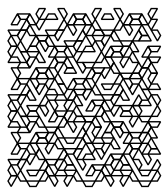

D8 None False True
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/filled_bw_0/' already exists.


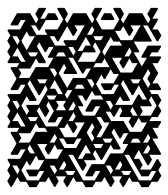

D8 None True False
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/circles/bw_0/' already exists.


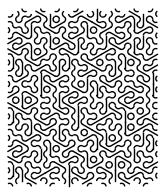

D8 None True True
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/circles/filled_bw_0/' already exists.


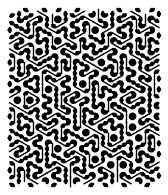

D8 AUTUMN False False
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/colored_0/' already exists.


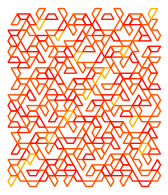

D8 AUTUMN False True
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/filled_colored_0/' already exists.


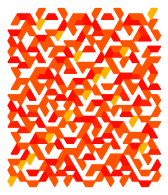

D8 AUTUMN True False
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/circles/colored_0/' already exists.


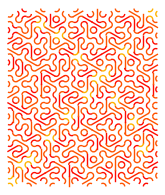

D8 AUTUMN True True
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/circles/filled_colored_0/' already exists.


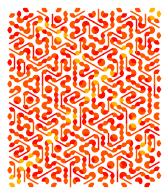

D8 SPRING False False
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/colored_0/' already exists.


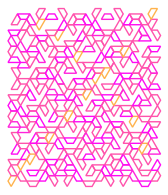

D8 SPRING False True
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/filled_colored_0/' already exists.


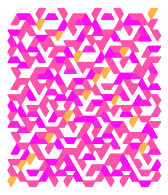

D8 SPRING True False
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/circles/colored_0/' already exists.


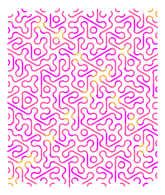

D8 SPRING True True
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/circles/filled_colored_0/' already exists.


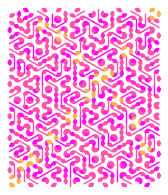

D8 SUMMER False False
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/colored_0/' already exists.


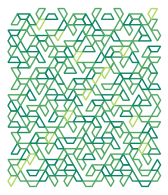

D8 SUMMER False True
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/filled_colored_0/' already exists.


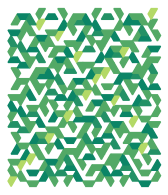

D8 SUMMER True False
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/circles/colored_0/' already exists.


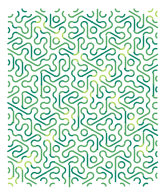

D8 SUMMER True True
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/circles/filled_colored_0/' already exists.


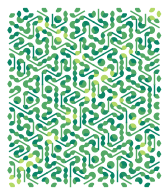

D8 WINTER False False
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/colored_0/' already exists.


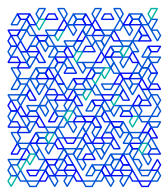

D8 WINTER False True
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/filled_colored_0/' already exists.


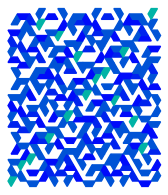

D8 WINTER True False
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/circles/colored_0/' already exists.


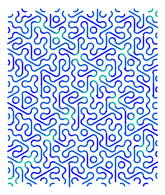

D8 WINTER True True
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  1  4  3  6  5  8  7 10  9 12 11 14 13 16 15]
[ 3 15  1  5  4  7  6  9  8 11 10 13 12 16  2 14]
[ 4 16  2  6  3  8  5 10  7 12  9 14 11 15  1 13]
[ 5 14 15  7  1  9  4 11  6 13  8 16 10  2  3 12]
[ 6 13 16  8  2 10  3 12  5 14  7 15  9  1  4 11]
[ 7 12 14  9 15 11  1 13  4 16  6  2  8  3  5 10]
[ 8 11 13 10 16 12  2 14  3 15  5  1  7  4  6  9]
[ 9 10 12 11 14 13 15 16  1  2  4  3  6  5  7  8]
[10  9 11 12 13 14 16 15  2  1  3  4  5  6  8  7]
[11  8 10 13 12 16 14  2 15  3  1  5  4  7  9  6]
[12  7  9 14 11 15 13  1 16  4  2  6  3  8 10  5]
[13  6  8 16 10  2 12  3 14  5 15  7  1  9 11  4]
[14  5  7 15  9  1 11  4 13  6 16  8  2 10 12  3]
[15  3  5  1  7  4  9  6 11  8 13 10 16 12 14  2]
[16  4  6  2  8  3 10  5 12  7 14  9 15 11 13  1]
Folder './hexagonal_tiles_of_groups/circles/filled_colored_0/' already exists.


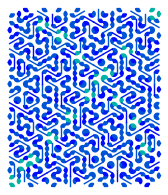

In [7]:
 
        
### import math
from sage.plot.graphics import Graphics

def hexagon(center, size):
    """
    Generates a hexagon centered at 'center' with the given 'size'.
    'size' is the distance from the center to any vertex (radius of circumscribed circle).
    """
    x0, y0 = center
    # Calculate vertices of the hexagon
    vertices = [(x0 + size * math.cos(math.pi/3 * i),
                 y0 + size * math.sin(math.pi/3 * i)) for i in range(6)]
    # Close the hexagon by repeating the first vertex
    vertices.append(vertices[0])
    return polygon(vertices, fill=False, color='black',axes=False,dpi=300)

def hexagon_tile(center,size,tile_type,color="black",fill=True):
    x0, y0 = center
    # Calculate vertices of the hexagon
    vertices = [(x0 + size * math.cos(math.pi/3 * i),
                 y0 + size * math.sin(math.pi/3 * i)) for i in range(6)]
    # Close the hexagon by repeating the first vertex
    vertices.append(vertices[0])
    plt = Graphics() #polygon(vertices, fill=False, color='black',axes=False,dpi=1000)
    verts = [(x0+size*math.cos(math.pi/3*(tile_type)),y0+size*math.sin(math.pi/3*(tile_type))),
             (x0+size*math.cos(math.pi/3*(1+tile_type)),y0+size*math.sin(math.pi/3*(1+tile_type))),
             (x0+size*math.cos(math.pi/3*(2+tile_type)),y0+size*math.sin(math.pi/3*(tile_type+2))),
             (x0+size*math.cos(math.pi/3*(3+tile_type)),y0+size*math.sin(math.pi/3*(tile_type+3)))
            ]
    verts.append(verts[0])
    plt += polygon(verts,fill=fill,color=color,axes=False,dpi=1000,thickness=2)
    return plt
    

def hexagon_circle_tile(center,size,tile_type=[1,3,5],color="black",fill=True):
    x, y = center
    #x0,y0 = center
    # Calculate vertices of the hexagon
    vertices = [(x + size * math.cos(math.pi/3 * i),
                 y + size * math.sin(math.pi/3 * i)) for i in range(6)]
    # Close the hexagon by repeating the first vertex
    vertices.append(vertices[0])
    plt = Graphics()
    for tt in tile_type:
        if tt < 0: # draw line
            a = (-tt)%6
            x0 = x+size*math.cos((2*a+1)*math.pi/6)*sqrt(3)/2
            y0 = y+size*math.sin((2*a+1)*math.pi/6)*sqrt(3)/2
            x1 = x-size*math.cos((2*a+1)*math.pi/6)*sqrt(3)/2
            y1 = y-size*math.sin((2*a+1)*math.pi/6)*sqrt(3)/2
            plt += line([(x0,y0),(x1,y1)],color=color,axes=False,thickness=2)
        else:    # draw filled_arc
            a = tt%6
            x0 = x+size*math.cos(2*math.pi/6*a)
            y0 = y+size*math.sin(2*math.pi/6*a)
            al = 2*(2+a)*math.pi/6
            be = al+2*2*math.pi/6
            plt += filled_arc((x0, y0), size/2, sector=(al,be), color=color,axes=False,fill=fill)
    return plt    

def hexagon_large_circle_tile(center,size,tile_type=0,color="black",fill=True):
    x, y = center
    #x0,y0 = center
    # Calculate vertices of the hexagon
    vertices = [(x + size * math.cos(math.pi/3 * i),
                 y + size * math.sin(math.pi/3 * i)) for i in range(6)]
    # Close the hexagon by repeating the first vertex
    vertices.append(vertices[0])
    plt = Graphics()#polygon(vertices, fill=False, color='black',axes=False,dpi=1000)
    #verts = [(x0+size*math.cos(math.pi/3*(2+tile_type)),y0+size*math.sin(math.pi/3*(tile_type+2))),
    #         (x0+size*math.cos(math.pi/3*tile_type),y0+size*math.sin(math.pi/3*tile_type)),
    #         (x0+size*math.cos(math.pi/3*(1+tile_type)),y0+size*math.sin(math.pi/3*(tile_type+1)))
    #        ]
    #verts.append(verts[0])
    #plt += polygon(verts,fill=True,color="black",axes=False,dpi=1000)
    tt = tile_type
    a = tt%6
    xa = x+size*math.cos(2*math.pi/6*a)
    ya = y+size*math.sin(2*math.pi/6*a)
    alA = 2*(2+a)*math.pi/6
    beA = alA+2*2*math.pi/6
    b = (tt+3)%6
    xb = x+size*math.cos(2*math.pi/6*b)
    yb = y+size*math.sin(2*math.pi/6*b)
    alB = 2*(2+b)*math.pi/6
    beB = alB+2*2*math.pi/6
    
    plt += filled_arc((xa, ya), size, sector=(alA,beA), color=color,axes=False,fill=fill)
    plt += filled_arc((xb, yb), size, sector=(alB,beB), color=color,axes=False,fill=fill)
    return plt   

def hexagonal_tiling(group, name,size,color_mode=None,circles=True,large=False,fill=True,iterDepth=0):
    """
    Create a grid of hexagons with specified number of rows and columns.
    """
    pattern = Graphics()
    # Vertical and horizontal distances between centers of hexagons
    v_dist = size*sqrt(3.0)
    h_dist = size*3/2
    v_dist_ = size*sqrt(3.0)*3/2
    h_dist_ = size*(3/2+3/4)
    #n = group.order()
    
    perms = regularPermutationsInSymmetricGroup(group) 
    gr = matrix(iterMat(group,iterDepth)) 
    print(gr)
    rows,cols = len(gr.rows()),len(gr.columns())
    #g = gcd(gr.list())
    tts = [[1,3,5],[0,2,4],
           [0,-1,3],[1,-2,4],[2,-3,5]]
    #tts = [[1,3],[1,5],[3,5],[0,2],[0,4],[2,4],[0,3],[1,4],[2,5]]
    #for r in range(6):
    #    s = set(list(range(6)))
    #    s = s.difference(set([r,(r+3)%6]))
    #    tts.append(list(sorted(s)))
    #N_tile_types = 2
    n = rows
    num_labels = n
    labels = np.array([[x] for x in list(range(0,n))])
    label_hue = np.uint8(179 * labels / np.max(labels))
    if not color_mode is None:
        label_hue = cv.applyColorMap(label_hue, getattr(cv, 'COLORMAP_' + color_mode.upper()))      
    max_cycle_length = max(len(pe.cycle_tuples()) for pe in perms)        
        
    for row in range(rows):
        for col in range(cols):
            # Offset for even and odd rows
            x_offset = col * h_dist
            y_offset = row * v_dist + (col % 2) * (v_dist / 2)
            #p1 = perms[row]
            #p2 = perms[col]
            #tile_type = (kk(p1,p2)//g)%2
            #tt = tts[tile_type]
            #pattern += hexagon_tile((x_offset, y_offset),size,tile_type)
            #print(g,kk(p1,p2),tt,x_offset,y_offset)
            if color_mode is None:
                color = "black"
            else:
                #h = 
                cl = len((perms[gr[col,row]-1]).cycle_tuples())
                lh = label_hue[int(cl/max_cycle_length*(len(label_hue)-1))]
                #print(cl,lh)
                b,g,r = lh[0]
                color = Color(r=r/255,g=g/255,b=b/255,space="rgb")
            if circles:
                if large:
                    pattern += hexagon_large_circle_tile((x_offset,y_offset),
                                                          size,gr[col,row]%6,color,fill=fill)
                else:    
                    #print(tts[gr[col,row]%len(tts)],len(tts),gr[col,row])
                    pattern += hexagon_circle_tile((x_offset,y_offset),
                                                   size,tts[gr[col,row]%len(tts)],color,fill=fill)
            else:
                pattern += hexagon_tile((x_offset,y_offset),size,gr[col,row]%6,color,fill=fill)
    plt = pattern    
    cc = "/circles" if circles and not large else "/circles_large" if circles and large else ""
    #ll = "/large" if large else ""
    if not color_mode is None:
        if not fill:
            folder = "./hexagonal_tiles_of_groups"+cc+"/colored_"+str(iterDepth)+"/"
        else:
            folder = "./hexagonal_tiles_of_groups"+cc+"/filled_colored_"+str(iterDepth)+"/"
        #img = sage_plot_to_cv2_array(plt,dpi=1000,figsize=[8,8])
        #result_img = create_colored_labels(img, color_mode)    
        #cv.imwrite(folder+str(name)+"_"+color_mode+".png", result_img)
        ensure_folder_exists(folder)            
        plt.save(folder+str(name)+"_"+color_mode+".png",figsize=[8,8],dpi=1000,aspect_ratio=1)
    else:
        if not fill:
            folder = "./hexagonal_tiles_of_groups"+cc+"/bw_"+str(iterDepth)+"/"
        else:
            folder = "./hexagonal_tiles_of_groups"+cc+"/filled_bw_"+str(iterDepth)+"/"
        ensure_folder_exists(folder)            
        plt.save(folder+str(name)+".png",figsize=[8,8],dpi=1000)
    return plt     


for group,name in groups:
    print(name)
    for cm in [None,"AUTUMN","SPRING","SUMMER","WINTER"]: 
        for circles in [False,True]:
            for fill in [False,True]:
                for iterDepth in [0,1,2]:
                    if group.order()>=4 and iterDepth>=1:
                        continue                    
                    print(name,cm,circles,fill)
                    plt = hexagonal_tiling(group,name=name,size=1,color_mode=cm,circles=circles,fill=fill,iterDepth=iterDepth)
                    plt.show(aspect_ratio=1,dpi=50)

        

In [ ]:
center = (0,0)
size = 10
tts = [[1,3,5],[0,2,4],
           [0,-1,3],[1,-2,4],[2,-3,5]]
for tt in tts:
    print(tt)
    hexagon_circle_tile(center,size,tile_type=tt,color="black",fill=False).show()
